# Home Assignment No. 2
# Part 1

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.


# Part One

## Task 1 - Bayesian ML (2 pts)

In this task, you will be asked to create probabilistic models based on some predefined data and make predictions. 
Remember that the Bayesian approach to modelling is based on the following notions:

Given objects, that we use for training:
* $\theta$ - vector of parameters of the model
* $D$ - dataset

The underlying nature of these objects can be described:
* $p(\theta)$ - prior distribution
* $p(D | \theta)$ - posterior distribution

What we would like to achieve:
* posterior distribution $p(\theta | D)$:
$$
p(\theta | D) = \frac{p(D | \theta) p(\theta)}{p(D)} \propto p(D | \theta) p(\theta).
$$
* Evidence $p(D)$;
* Predictions $p(D_{new} | D)$:
$$
p(D_{new} | D) = \int p(D_{new} | \theta) p(\theta | D) d\theta.
$$

So, in other words, there are two main steps to Bayesian modeling, which will take place in this task:

1) choosing the best probabilistic model for observed data, i.e. specifying proper $p(\theta)$ and $p(D | \theta)$

2) computing the posterior distribution $p(\theta | D)$;

These two steps are exactly what you will be asked to do in the next subtasks.

One of the most widely used libraries in probabilistic programming is PyMC3, which transforms a lot of the math (such as Variational Inference) into simple functions. For those of you unfamiliar with PyMC3, here are the links to the tutorials, similar to what you should do in this task: https://docs.pymc.io/notebooks/getting_started (getting familiar with pymc3 library and its capabilities); https://docs.pymc.io/notebooks/marginalized_gaussian_mixture_model.html (Mixture models, which will be useful in one of the subtasks); https://docs.pymc.io/api/distributions.html (a lot of distributions available in PyMC3).

In [1]:
import numpy as np
from numpy import random, sum as nsum, concatenate
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 16

In [2]:
# these commands have been tested on Google Collab. If you are using 
# jupyter locally and this combination of commands is not working, try manually downloading pymc3, 
# depending on your OS: https://github.com/pymc-devs/pymc3#installation 
 
! pip install pymc3==3.6
! pip install arviz==0.4.0
! pip install pandas==0.24.2

  Using cached pandas-1.1.5-cp37-cp37m-manylinux1_x86_64.whl (9.5 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2
  Using cached pandas-0.24.2-cp37-cp37m-manylinux1_x86_64.whl (10.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.17.0 requires pandas>=0.25, but you have pandas 0.24.2 which is incompatible.


### Task 1.1 (1 pt.)
The first subtask is quite simple and designed to get you familiar with PyMC3. You will deal with a coin flip scenario: you suspect that there is some external factor, which you can control, that influences the outcome of your coin-flip. In order to check if your suspicions are true, you will conduct a simple A/B test, i.e. create a control and test group, for which the external factor will and will not be present, respectively. You will need to construct the probability model using PyMC3 to answer the question of its influence on the outcome.

To achieve that, please follow the completed code and the following plan:

1) Analyze the data - print out the mean for both groups, are they similar?

2) Built the probabilistic models for both groups: 

  1. What type of distribution does the likelihood of the coin-flip outcomes follow? What type of distribution do its parameters follow? Is there any prior knowledge about the parameters that we can use?

3) Sample from the modeled posterior distributions and analyze the results: after sampling, use `traceplot` function to plot the distributions of the model's parameters.

In order to achieve your point for this sub-task:

1) fill in the missing code

2) answer the questions in the devoted cell: are the control and test groups' posterior distributions comparable? can we say that the initial external factor actually influences the results of our coin-flips?

**NOTE**: when building the model you may find that a couple of different (or one being the special case of the other) distributions can fit, for example, the parameter distribution. You can choose whatever you prefer, the task will be assessed by the plotted results and your interpretation of them.
 

In [3]:
import theano
import theano.tensor as T 
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
#where 0 is test group and 1 is a control group
control_flips = [0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,
                   1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,
                   0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,
                   0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0]
test_flips = [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,
              0,0,0,0,1,0,0,0,0,1,0,0,0,0]

1) Analyze the data - print out the mean for both groups, are they similar?

In [5]:
### BEGIN SOLUTION (do not delete this comment!)
import warnings
warnings.filterwarnings("ignore")
                        
print('Mean of control group:', np.mean(control_flips))
print('Mean of test group:', np.mean(test_flips))
#ans = 'yes' if (np.mean(control_flips) - np.mean(test_flips)) / np.mean(control_flips) < 0.1 else 'no'
print('Means are similar but not equal')

### END SOLUTION (do not delete this comment!)

Mean of control group: 0.17
Mean of test group: 0.15
Means are similar but not equal


Built the probabalistic models for both groups.

In [6]:
model_flips = pm.Model()
with model_flips:
    ### BEGIN SOLUTION (do not delete this comment!)
    #distributions.continuous
    w_ctrl = pm.Beta('p_c', alpha = 2, beta = 2)
    w_tst = pm.Beta('p_t', alpha = 2, beta = 2)
    
    #distributions.discrete.
    y_c = pm.Bernoulli('y_c', p=w_ctrl, observed=control_flips)
    y_t = pm.Bernoulli('y_t', p=w_tst, observed=test_flips)
    ### END SOLUTION (do not delete this comment!)

Sample from the modelled posterior distributions and analyze the results (sampling is already filled in for you). To analyze the results: use pymc3's`traceplot` function to plot the distributions of the model's parameters; use pymc3's `summary` to have a look at the result in more detail.

In [7]:
#sampling from the model
with model_flips:
    samples_flips = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_t, p_c]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:02<00:00, 1467.78draws/s]


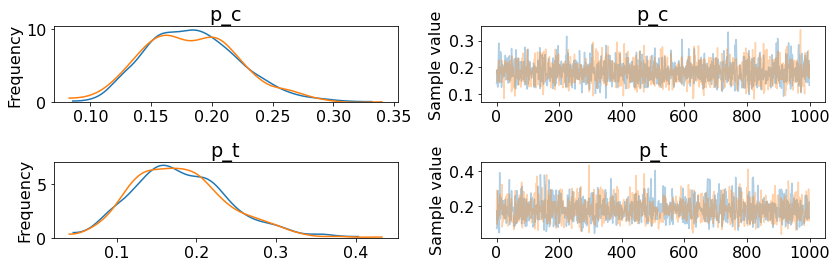

In [8]:
### BEGIN SOLUTION (do not delete this comment!)
#import arviz as az
#with model_flips:
#    az.plot_trace(samples_flips)
pm.traceplot(samples_flips);
### END SOLUTION (do not delete this comment!)

In [9]:
### BEGIN SOLUTION (do not delete this comment!)
import arviz as az
with model_flips:
    display(az.summary(samples_flips, round_to=3))
    #display(pm.summary(samples_flips))
### END SOLUTION (do not delete this comment!)

,mean,sd,mcse_mean,mcse_sd,hpd_3%,hpd_97%,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
p_c,0.183,0.039,0.001,0.001,0.115,0.256,2066.582,2005.711,2043.338,1448.291,1.001
p_t,0.180,0.060,0.001,0.001,0.078,0.295,1890.707,1807.471,1833.074,1103.344,1.002


**Answer the questions in the following cell: are the control and test groups' posterior distributions comparable? can we say that the initial external factor actually influeneces the results of our coin-flips?**

*BEGIN SOLUTION (do not delete this comment!)* 

The control and test groups' posterior distributions look quite similar. Looking in the summary, we can see that they have a very close mean and quite similar standard deviations and other parameters. I think we can say that based on this result we can't reject the null hypothesis and that the external factor doesn't influence the results of our coin-flips. Although, one may also want to assess how statistically significant this result is.

So, our conclusion is that from our experiment we can't notice the influence of the external factor on the distribution.

*END SOLUTION (do not delete this comment!)*

### Task 1.2 (1 pt.)

Now that you have understood the basic PyMC3 pipeline, let's try to model more complex data in a similar manner: 

1) load file sample_bml.csv - this file contains 1000 samples of some data with two labels '0' and '1' (the first column represents the labels).

2) plot the histograms of both groups of data in one figure 

3) analyze the resulting plot - write in the cell what type of data is in front of you and its characteristics

4) build the model 

    1) What are the types of distributions you would use for each of the presented group of data? 
    
    2) What about the parameters of these distributions? 
    
    3) What distribution is the resulting likelihood follows?
 
5) sample from the resulting model

6) plot the trace - use pymc3's `traceplot`

7) sample from the posterior predictive distribution of the model - use pymc3's `sample_posterior_predictive`

8) once again plot the histogram of the original data distribution and the resulting posterior predictive distribution

9) analyzing the results that you have achieved in 7) and 9), answer the questions: assess the success of your model - can it accurately approximate the original data distribution? how can you improve this model, if you want to achieve even better results?

1) load file sample_bml.csv 

In [10]:
### BEGIN SOLUTION (do not delete this comment!)
data = np.genfromtxt('sample_bml.csv', dtype=float, delimiter = ' ')

print(data.shape)
#print(data[:5])
#data = pd.r
### END SOLUTION (do not delete this comment!)

(1000, 2)


2) plot the histogramms of both groups of data in one figure

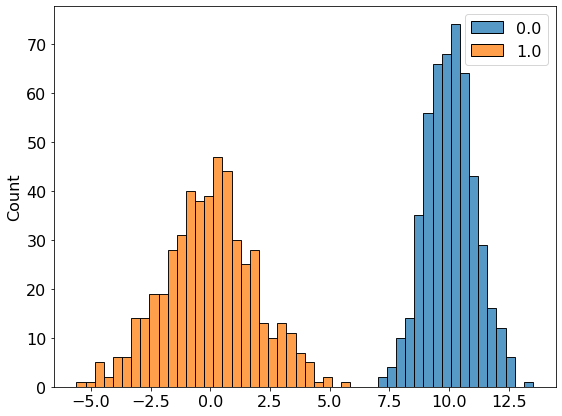

In [11]:
### BEGIN SOLUTION (do not delete this comment!)
import seaborn as sns
plt.figure(figsize = (9, 7))
sns.histplot(data=data, x = data[:, 1], hue = data[:, 0], bins = 50)
plt.show()
#ax = data.plot(kind="hist")
### END SOLUTION (do not delete this comment!)

3) analyze the resulting plot - write in the cell what type of data is in front of you and its characteristics

*BEGIN SOLUTION (do not delete this comment!)*

On the histogram we can see the distribution of the objects with a single feature and different labels, the left peak consists of objects with label 1, the right one is of objects with label 0.

We can see that each of these groups' distribution is close to Normal, but the left one has higher variance, approximately twice bigger. The mean of the left one is approximately 0., the mean of the right one is approximately 10.

*END SOLUTION (do not delete this comment!)*

4) build the model 

In [12]:
mixture_model = pm.Model()

with mixture_model:
  ### BEGIN SOLUTION (do not delete this comment!)
    y_0_obs = data[data[:, 0] == 0][:, 1]
    y_1_obs = data[data[:, 0] == 1][:, 1]
    
    mu0 = pm.Normal("mu0", mu=10., sd=1.)
    mu1 = pm.Normal("mu1", mu=0., sd=1.)
    #sigma0 = pm.Normal("sigma0", mu=1., sd=1.5)
    sigma0 = pm.Uniform("sigma0", lower = 0.3, upper=2)
    sigma1 = pm.Uniform("sigma1", lower = 1, upper=3.5)
    #sigma1 = pm.Normal("sigma1", mu=2., sd=1.5)
    
    y_0 = pm.Normal("y_0", mu = mu0, sd = sigma0, observed = y_0_obs)
    y_1 = pm.Normal("y_1", mu = mu1, sd = sigma1, observed = y_1_obs)
  ### END SOLUTION (do not delete this comment!)

5) sample from the resulting model

In [13]:
with mixture_model:
    step = pm.NUTS()
    nuts_trace = pm.sample(2000, step)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma1, sigma0, mu1, mu0]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:04<00:00, 1171.89draws/s]


6) plot the trace - use pymc3's traceplot

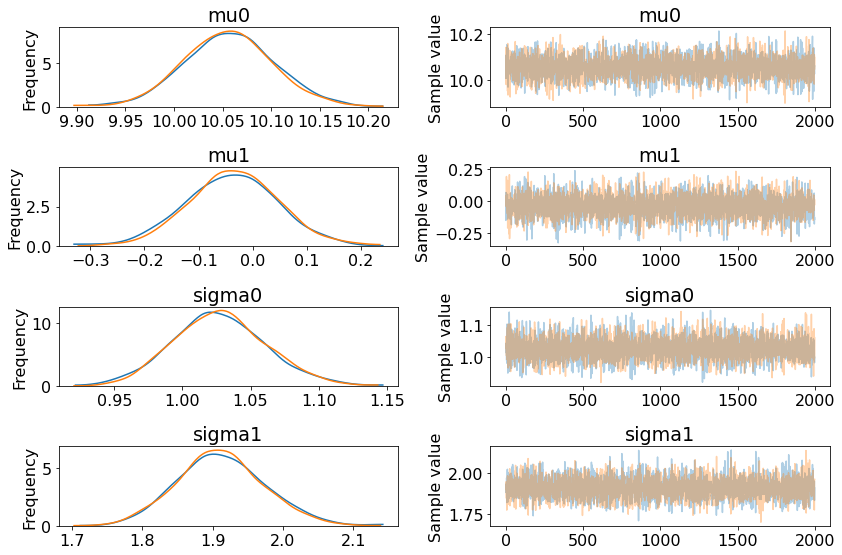

In [14]:
### BEGIN SOLUTION (do not delete this comment!)
pm.traceplot(nuts_trace);
### END SOLUTION (do not delete this comment!)

7) sample from the posterior predictive distribution of the model - use pymc3's sample_posterior_predictive



In [15]:
### BEGIN SOLUTION (do not delete this comment!)
with mixture_model:
    posterior_samples = pm.sample_posterior_predictive(nuts_trace, samples = 1, random_seed=0)
    posterior_samples['y_0'] = posterior_samples['y_0'].reshape(1, -1)
    posterior_samples['y_1'] = posterior_samples['y_1'].reshape(1, -1)
    posterior_data = np.concatenate((posterior_samples['y_0'], posterior_samples['y_1']), axis = 1)
### END SOLUTION (do not delete this comment!)

100%|██████████| 1/1 [00:00<00:00,  4.57it/s]


8) once again plot the histogram of the original data distribution and the resulting posterior predictive distribution

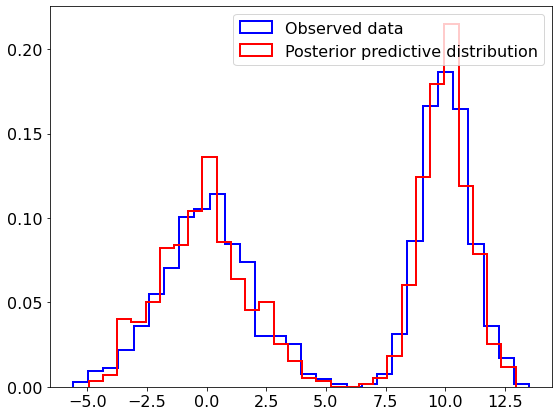

In [16]:
### BEGIN SOLUTION (do not delete this comment!)
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
ax.hist(data[:, 1], histtype='step', density=True, bins = 30, lw = 2, fill = False, color = 'blue', label = 'Observed data');
ax.hist(posterior_data[0, :], histtype = 'step', density=True, bins = 30, lw = 2, fill = False, color = 'red', label = 'Posterior predictive distribution');
ax.legend()
fig.show()
### END SOLUTION (do not delete this comment!)

**Answer the questions: asses the success of you model - can it accurately approximate the original data distribution? how can you improve this model, if you want to achieve even better results?**

*BEGIN SOLUTION (do not delete this comment!)*

The model approximates the original data not bad, but still the approximation is more sharp than the original data and has noticeable discrepancies. 

In order to improve the model, we may require more data, or try to localize parameters of the distribution better by sampling more times from the resulting model.We can also try different distributions for our prior in case it may affect the final result.

*END SOLUTION (do not delete this comment!)*

## Task 2 - Gaussian Processes (1 pt.)

In the following exercise, you will need to fit the gaussian process with different kernels on the ```elecricity_consumption_FR.csv``` time series data. We have already loaded and prepared the train/test datasets for you below.

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

**The task**:
* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.
* Plot mean and confidence interval of the prediction. 
* Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

In [17]:
#! pip install GPy==1.9.9

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('elecricity_consumption_FR.csv')

In [20]:
data.dropna(inplace=True)

In [21]:
y = np.array(data.values)
X = np.array(data.index)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


Normalize the target value by fitting a transformation on the train (use sklearn.preprocessing.StandardScaler)

In [23]:
### BEGIN SOLUTION (do not delete this comment!)
scaler = StandardScaler()
scaler.fit(y_train)
y_train_scaled = scaler.transform(y_train)
y_test_scaled  = scaler.transform(y_test)
### END SOLUTION (do not delete this comment!)

Plot the resulting target against the time index.

No handles with labels found to put in legend.


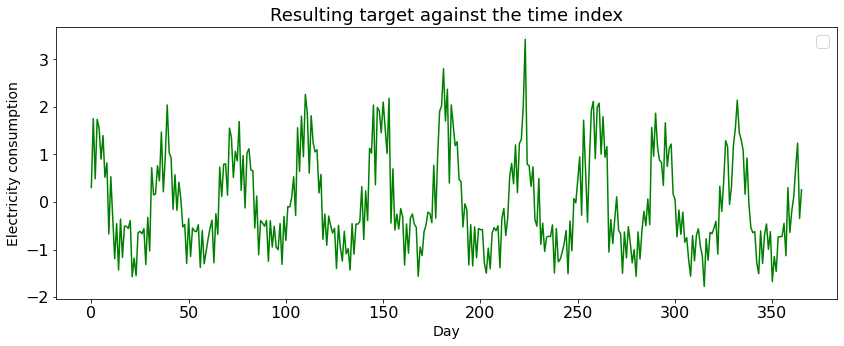

In [24]:
### BEGIN SOLUTION (do not delete this comment!)
fig, ax = plt.subplots(1, 1, figsize = (14, 5))
#ax.plot(X_train, y_train_scaled, label="train")
ax.plot(np.concatenate((X_train, X_test)), np.concatenate((y_train_scaled, y_test_scaled)), color='green')
#ax.plot(X_test, y_test_scaled, label="test")
ax.set_title('Resulting target against the time index', fontsize=18)
ax.set_xlabel('Day', fontsize=14)
ax.set_ylabel('Electricity consumption', fontsize=14)
ax.legend()
fig.show()
### END SOLUTION (do not delete this comment!)

Plot mean and confidence interval of the prediction.

Optimization restart 1/9, f = 218.3448108444914
Optimization restart 2/9, f = 226.0016738710277
Optimization restart 3/9, f = 363.24582957683515
Optimization restart 4/9, f = 219.50559663564678
Optimization restart 5/9, f = 342.75515414460597
Optimization restart 6/9, f = 415.6574925062548
Optimization restart 7/9, f = 373.1738216887128
Optimization restart 8/9, f = 571.7986111564201
Optimization restart 9/9, f = 335.935427640494


{'dataplot': [<matplotlib.collections.PathCollection at 0x7f4f1fd67080>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f4f1a984d30>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f4f1a919400>]}

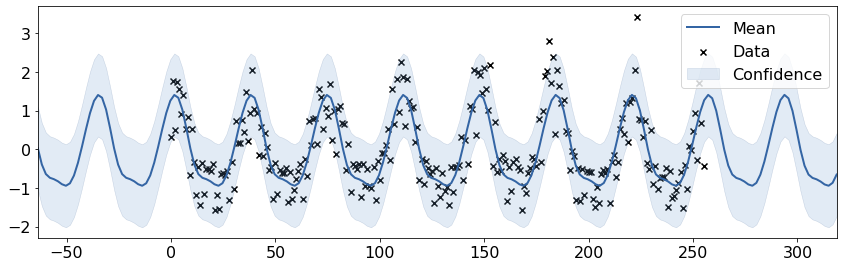

In [25]:
### BEGIN SOLUTION (do not delete this comment!)
import GPy

random.seed(0)

k1 = GPy.kern.PeriodicExponential(1, period = 30.)
k2 = GPy.kern.StdPeriodic(1, period = 42.)
kernel = k1 + k2

gp = GPy.models.GPRegression(X_train, y_train_scaled, kernel)
gp.optimize_restarts(num_restarts=9);
y_pred, y_pred_var = gp.predict(X_test)

gp.plot(figsize = (12, 4))
### END SOLUTION (do not delete this comment!)

Inspect them on normality by scatter plot: plot predicted points/time series against true values.

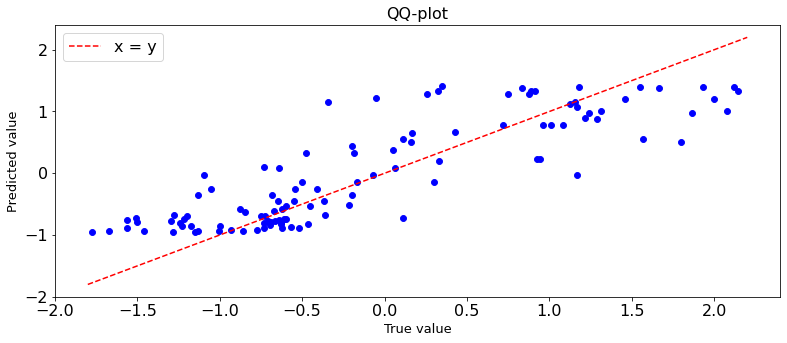

In [26]:
### BEGIN SOLUTION (do not delete this comment!)
import scipy.stats as stats
fig, ax = plt.subplots(1, 1, figsize = (13, 5))

#ax.scatter(X_test, y_test_scaled)
ax.plot(np.linspace(-1.8, 2.2, 200), np.linspace(-1.8, 2.2, 200), color = 'red', linestyle = '--', label = 'x = y')
ax.scatter(y_test_scaled, y_pred, color = 'blue', lw = 0.9)
ax.set_title('QQ-plot', fontsize = 16)
ax.set_xlabel('True value', fontsize = 13)
ax.set_ylabel('Predicted value', fontsize = 13)
ax.legend()
fig.show()
### END SOLUTION (do not delete this comment!)

Estimate the prediction error with r2_score. R2-score accepted > 0.7 on test sample.

In [27]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.metrics import r2_score
print('R2-score is:', r2_score(y_test_scaled, y_pred))
### END SOLUTION (do not delete this comment!)

R2-score is: 0.721645474374373


## Task 3 - MNIST, kMNIST component analysis and manifold learning. (4 pts.)

### Task 3.1. (1 pt)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimensionality, decompose the dataset on principle components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case, yoyu may use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. Estimate the intrinsic dimensionality of the dataset. Provide the plot.
2. Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [28]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

dg = datasets.load_digits()

data = StandardScaler().fit_transform(dg.data)

1) Estimate the intrinsic dimentionality of the dataset. Provide the plot.

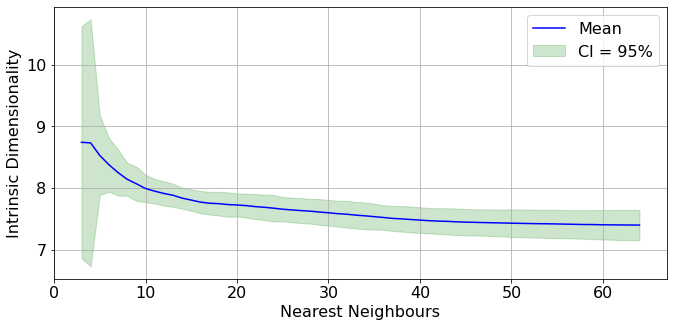

In [29]:
### BEGIN SOLUTION (do not delete this comment!)

# Implementation of 'Maximum Likelihood Estimation of Intrinsic Dimension' by Elizaveta Levina and Peter J. Bickel
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

def intrinsic_dim_sample_wise(X, k = 5):
    neighb = NearestNeighbors(n_neighbors=k + 1).fit(X)
    dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:]
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample

def intrinsic_dim_scale_interval(X, k1 = 10, k2 = 20):
    X = pd.DataFrame(X).drop_duplicates().values
    intdim_k = []
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k

def repeated(func, X, nb_iter = 100, random_state = None, verbose = 0, mode = 'bootstrap', **func_kw):
    """
    Implementation of 'Maximum Likelihood Estimation of Intrinsic Dimension' 
    by Elizaveta Levina and Peter J. Bickel
    """
    
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []

    iters = range(nb_iter)
    if verbose > 0:
        iters = tqdm(iters)    
    for i in iters:
        if mode == 'bootstrap':
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results


k1, k2 = 3, data.shape[1]
intrinsic_dim = np.array(repeated(intrinsic_dim_scale_interval, data, random_state=0, nb_iter=20, k1=k1, k2=k2))

mean = np.mean(intrinsic_dim, axis=0)
std = np.std(intrinsic_dim, axis=0)
lower, upper = mean - 1.96 * std, mean + 1.96 * std

fig, ax = plt.subplots(1, 1, figsize = (11, 5))
ax.plot(np.arange(k1, k2 + 1), mean, color='blue', label='Mean')
ax.fill_between(np.arange(k1, k2 + 1), lower, upper, color="green", alpha=0.2, label='Cl = 95%')
ax.set_xlabel('Nearest Neighbours')
ax.set_ylabel('Intrinsic Dimensionality')
ax.legend()
ax.grid(True)
fig.show()
### END SOLUTION (do not delete this comment!)

2) Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with 6 different set of components and corresponding explained variance. You can choose any digit from the dataset.

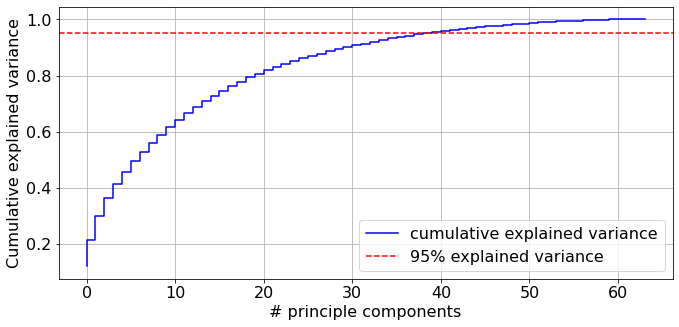

In [30]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.decomposition import PCA

n = data.shape[1]
random.seed(42)

pca = PCA(n_components=n, random_state=0)
pca.fit(data)
exp_var = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots(1, 1, figsize = (11, 5))
#ax.plot(np.arange(n), exp_var, color='blue', label='cumulative explained variance')
ax.step(np.arange(n), exp_var, color='blue', label='cumulative explained variance')
ax.axhline(y=0.95, color='r', linestyle='--', label = '95% explained variance')
ax.set_xlabel('# principle components')
ax.set_ylabel('Cumulative explained variance')
ax.legend()
ax.grid(True)
fig.show()
### END SOLUTION (do not delete this comment!)

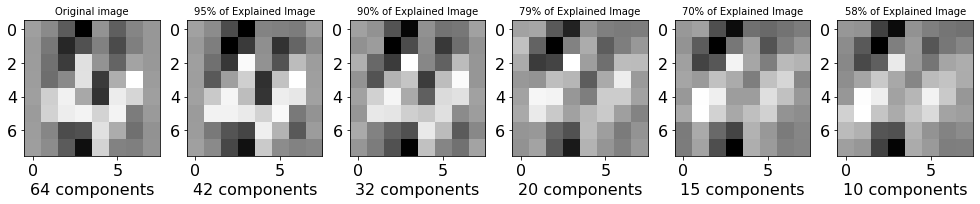

In [31]:
### BEGIN SOLUTION (do not delete this comment!)
n = 6

comps = [data.shape[1], 42, 32, 20, 15, 10]
img = data[4]

fig, ax = plt.subplots(1, n, figsize = (17, 3))
 
        
for i in range(n):
    pca = PCA(n_components=comps[i], random_state=0)
    pca.fit(data)
    img_trans = pca.transform([img])
    new_img = pca.inverse_transform(img_trans)
    exp_var = np.sum(pca.explained_variance_ratio_)
    
    ax[i].imshow(np.reshape(new_img, (8, 8)), cmap=plt.cm.gray) #interpolation='nearest')
    if (i == 0):
        ax[i].set_title('Original image', fontsize = 10)
    else:
        ax[i].set_title('{}% of Explained Image'.format(int(exp_var * 100)), fontsize = 10)
    ax[i].set_xlabel('{} components'.format(comps[i]))
fig.show()
### END SOLUTION (do not delete this comment!)

### Task 3.2. (1 pt.)

Here we will visualize the decomposition in order to observe how data diverges across different manifold learning methods. We are to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features. 

1. Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimension**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
2. Show that the `Isomap` gives a statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 sentences.


In [32]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap

1) Calculate new features on the data with ICA, PCA and Isomap. Choose the number of components according to your estimation of intrinsic dimention. Calculate the classification accuracy on these features with LogisticRegression on cross_val=5 with  3  repeats. Use RepeatedKFold and fit the random_seed = 42.

In [33]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold, cross_val_score
random.seed(42)
score = {'Isomap': [], 'PCA' : [], 'ICA': []}

iso = Isomap(n_components=8, eigen_solver='dense', n_jobs=-1)
x_iso = iso.fit_transform(data)
x_iso = StandardScaler().fit_transform(x_iso)

pca = PCA(n_components=8, svd_solver = 'full')
x_pca = pca.fit_transform(data)
x_pca = StandardScaler().fit_transform(x_pca)

ica = FastICA(n_components=8)
x_ica = ica.fit_transform(data)
x_ica = StandardScaler().fit_transform(x_ica)

rkf = RepeatedKFold(n_splits=5, n_repeats=3)
clf = LogisticRegression(C = 10, n_jobs = -1)
    
for X, name in zip([x_iso, x_pca, x_ica], ['Isomap', 'PCA', 'ICA']):
    scores = cross_val_score(clf, X, dg.target, scoring='accuracy', cv=rkf, n_jobs=-1)
    print('For %s accuracy = %.3f, std = %.3f' % (name, np.mean(scores), np.std(scores)))
    score[name].append(np.mean(scores))
    score[name].append(scores)
### END SOLUTION (do not delete this comment!)

For Isomap accuracy = 0.954, std = 0.012
For PCA accuracy = 0.874, std = 0.011
For ICA accuracy = 0.873, std = 0.015


2) Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. 

In [34]:
### BEGIN SOLUTION (do not delete this comment!)
import scipy.stats as sps

stat_pca, pvalue_pca = sps.ttest_ind(score['Isomap'][1], score['PCA'][1], equal_var=True)

stat_ica, pvalue_ica = sps.ttest_ind(score['Isomap'][1], score['ICA'][1], equal_var=True)

print("Statistically significant improvement of Isomap over PCA with p-value {}".format(pvalue_pca))
print("Statistically significant improvement of Isomap over ICA with p-value {}".format(pvalue_ica))
### END SOLUTION (do not delete this comment!)

Statistically significant improvement of Isomap over PCA with p-value 4.6430565954164496e-17
Statistically significant improvement of Isomap over ICA with p-value 1.927801688261632e-15


3) Justify your results, write down 2-3 senteces.

*BEGIN SOLUTION (do not delete this comment!)*

Looking at the obtained p-values we can interpret the result in the following way: the probability that Isomap works better just by accident is very small, close to 0. Therefore, we can conclude that Isomap gives statistically significant improvement on the classification accuracy over both PCA and ICA.

*END SOLUTION (do not delete this comment!)*

### Task 3.3. kMNIST dimensionality reduction. (2 pts.)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engineer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

1. __(2 pt.)__ Get accuracy on `test_set` more than 93%`. 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`. 

1) Get accuracy on test_set more than 93%.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz')
x_test = load('kmnist-test-imgs.npz')
y_train = load('kmnist-train-labels.npz')
y_test = load('kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [36]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

random.seed(10)

pca = PCA(n_components=50, svd_solver = 'full')
scaler = MinMaxScaler() 

pca.fit(x_train)
x_train_pca = pca.transform(x_train) 
x_test_pca = pca.transform(x_test)

knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(x_train_pca, y_train)
y_pred = knn.predict(x_test_pca)
print('Accuracy on kMNIST with reduced dimensionality is {}%'.format(100 * accuracy_score(y_test, y_pred)))
### END SOLUTION (do not delete this comment!)

Accuracy on kMNIST with reduced dimensionality is 93.44%


## Task 4 - Clustering (2 pts.)

### Task 4.1. Explore KMeans and Gaussian Mixture algorithms (1 pt.)

Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. Apply the algorithm with the true number of clusters and try out at least two **other variants** of the number of clusters: a smaller and a larger one than the true number.;
2. For each number of clusters **visualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

In [37]:
import numpy as np

True number of clusters is 15


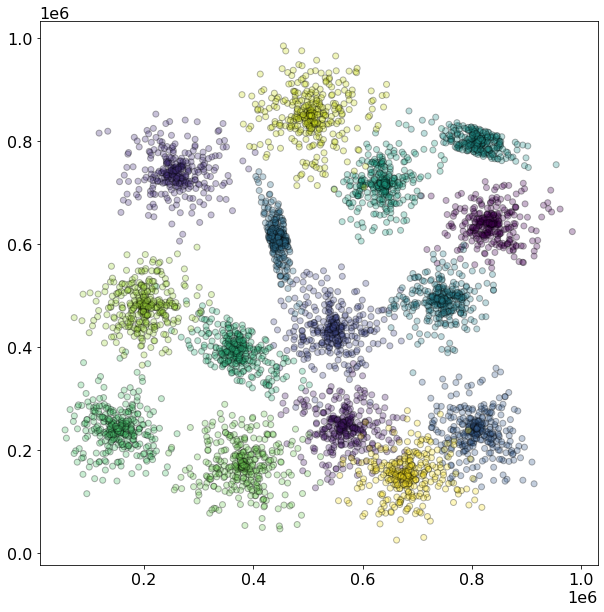

In [38]:
points, labels = np.loadtxt('clustering.txt'), np.loadtxt('clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [39]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

1) For each algorithm your task is to try to find the parameters leading to the best performance for n_clusters=true_number_of_clusters

In [40]:
## BEGIN SOLUTION (do not delete this comment!)

from collections import defaultdict
from sklearn.cluster import DBSCAN, AgglomerativeClustering, MiniBatchKMeans #AffinityPropagation
from sklearn.metrics import silhouette_score, mutual_info_score

true_clusters = np.max(labels)
best_params = defaultdict(dict)


clustering_search = {
    'KMeans': { 'init': ['k-means++', 'random'],
        'n_init': [3, 5, 8, 10, 12],
        'max_iter' : [150, 250, 350]},
    'MBKmeans': { 
        'init' : ['k-means++', 'random'],
        'max_iter' : [50, 100, 150, 200, 250],
        'batch_size' : [50, 100, 150, 200]},
    'GaussianMixture': { 'covariance_type': ['full', 'tied', 'diag', 'spherical'],
        'max_iter' : [50, 100, 150],
        'tol': [1e-3, 1e-4, 1e-5, 1e-7]},
    'AgglomerativeClustering': {'affinity': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'],
        'linkage': ['ward', 'complete', 'average', 'single']}
}

#for name_clust, num_cl in zip(['true clusters', 'less clusters', 'more clusters'], [true_clusters, less_clusters, more_clusters]):
best_params_kmeans = {}
best_params_mbkmeans = {}
best_params_gm = {}
best_params_agglom = {}
score_kmeans = score_mbkmeans = score_gm = score_agglom = -100


for init in ['k-means++', 'random']:
    for n_init in [3, 5, 8, 10, 12]:
        for max_iter in range(100, 360, 50):
            alg = KMeans(n_clusters=true_clusters, random_state=0, n_jobs=-1, 
                         init = init, n_init = n_init, max_iter = max_iter)
            alg.fit(points)
            score = silhouette_score(points, alg.predict(points))
            if (score > score_kmeans):
                score_kmeans = score
                best_params_kmeans['init'] = init
                best_params_kmeans['n_init'] = n_init
                best_params_kmeans['max_iter'] = max_iter

for init in ['k-means++', 'random']:
    for batch_size in range(50, 210, 50):
        for max_iter in range(50, 310, 50):
            alg = MiniBatchKMeans(n_clusters = true_clusters, random_state=0,
                         init = init, batch_size = batch_size, max_iter = max_iter)
            alg.fit(points)
            score = silhouette_score(points, alg.predict(points))
            if (score > score_mbkmeans):
                score_mbkmeans = score
                best_params_mbkmeans['init'] = init
                best_params_mbkmeans['max_iter'] = max_iter
                best_params_mbkmeans['batch_size'] = batch_size
                
                
for covariance_type in ['full', 'tied', 'diag', 'spherical']:
    for max_iter in range(50, 210, 50):
        for tol in [1e-3, 1e-4, 1e-5, 1e-7]:
            alg = GaussianMixture(n_components= true_clusters, random_state=0,
                                  covariance_type = covariance_type, max_iter = max_iter, tol = tol)

            alg.fit(points)
            score = silhouette_score(points, alg.predict(points))
            if (score > score_gm):
                score_gm = score
                best_params_gm['covariance_type'] = covariance_type
                best_params_gm['max_iter'] = max_iter
                best_params_gm['tol'] = tol
            
            
for affinity in ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']:
    for linkage in ['ward', 'complete', 'average', 'single']:
        if (linkage == 'ward' and affinity != 'euclidian'):
            pass
        else:
            alg = AgglomerativeClustering(n_clusters = true_clusters,
                                          affinity = affinity, linkage = linkage)
            pred = alg.fit_predict(points)
            score = silhouette_score(points, pred)
            if (score > score_agglom):
                score_agglom = score
                best_params_agglom['affinity'] = affinity
                best_params_agglom['linkage'] = linkage

for method, params, score in zip(['KMeans', 'MBKmeans', 'GaussianMixture', 'AgglomerativeClustering'], 
                                [best_params_kmeans, best_params_mbkmeans, best_params_gm, best_params_agglom],
                                [score_kmeans, score_mbkmeans, score_gm, score_agglom]):
    print('method: ', method)
    print(params)
    print('best score = ', score)
        
### END SOLUTION (do not delete this comment!)

method:  KMeans
{'init': 'k-means++', 'n_init': 3, 'max_iter': 100}
best score =  0.6261563743783776
method:  MBKmeans
{'init': 'k-means++', 'max_iter': 50, 'batch_size': 150}
best score =  0.6261925151989053
method:  GaussianMixture
{'covariance_type': 'tied', 'max_iter': 50, 'tol': 0.001}
best score =  0.6261804740217701
method:  AgglomerativeClustering
{'affinity': 'euclidean', 'linkage': 'average'}
best score =  0.6091772373449134


2) Apply the algorithm with the true number of clusters and try out at least two other variants of the number of clusters: a smaller and a larger one than the true number.;

 Do not forget that despite the plot picturing just the KMeans and GuassianMizture, you will need to ADDITIONALLY try put and plot two other clustering methods. 

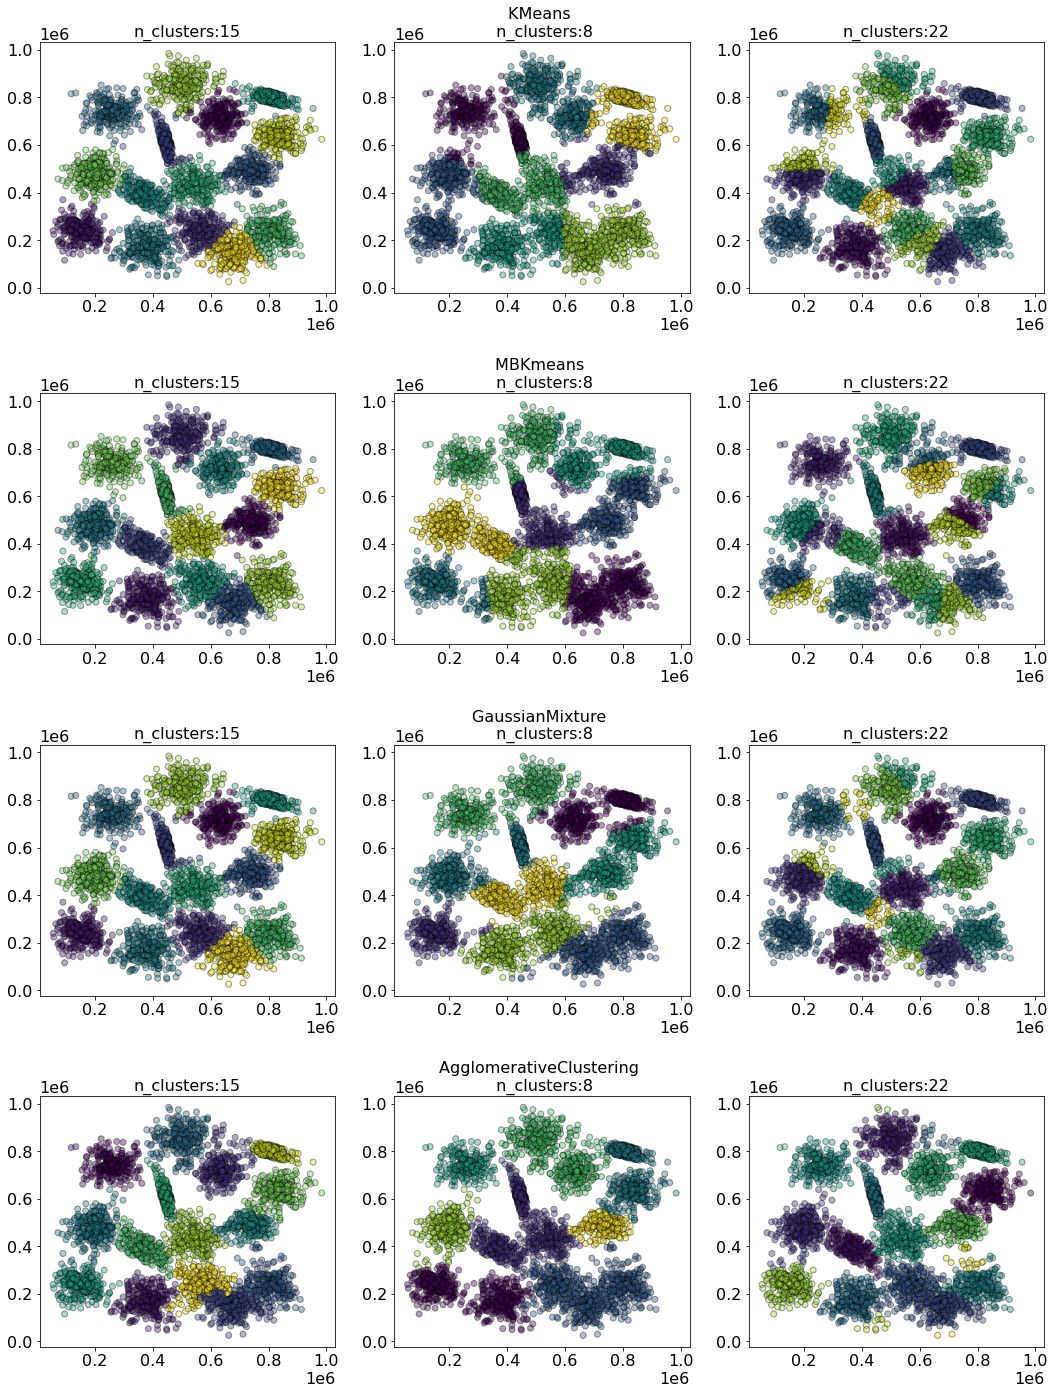

In [41]:
## BEGIN SOLUTION (do not delete this comment!)

less_clusters = true_clusters - 7
more_clusters = true_clusters + 7

fig, axes = plt.subplots(4, 3, figsize=(18, 24))
plt.subplots_adjust(hspace=0.4)

def return_alg(idx, num_cl):
    if (idx == 0):
        return KMeans(n_clusters=num_cl, random_state=0, n_jobs=-1, **best_params_kmeans)
    elif (idx == 1):
        return MiniBatchKMeans(n_clusters = num_cl, random_state=0, **best_params_mbkmeans)
    elif (idx == 2):
        return GaussianMixture(n_components = num_cl, random_state=0, **best_params_gm)
    else:
        return AgglomerativeClustering(n_clusters = num_cl, **best_params_agglom)
    

for i, method in zip(range(4), ['KMeans', 'MBKmeans', 'GaussianMixture', 'AgglomerativeClustering']):
    for j, num_cl in zip(range(3), [true_clusters, less_clusters, more_clusters]):
        
        alg = return_alg(i, num_cl)
        alg.fit(points)
        if (method != 'GaussianMixture'):
            labs = alg.labels_
        else:
            labs = alg.predict(points)
        axes[i, j].scatter(points[:, 0], points[:, 1], c = labs, alpha=0.4, edgecolor='k')
        
        if (j == 1):
            axes[i, j].set_title('{} \n n_clusters:{}'.format(method, num_cl), fontsize = 16)
        else:
            axes[i, j].set_title('n_clusters:{}'.format(num_cl), fontsize = 16)
fig.show()
### END SOLUTION (do not delete this comment!)

3) For each number of clusters vizualize the clustering result, calculate the clustering metrics and plot them;


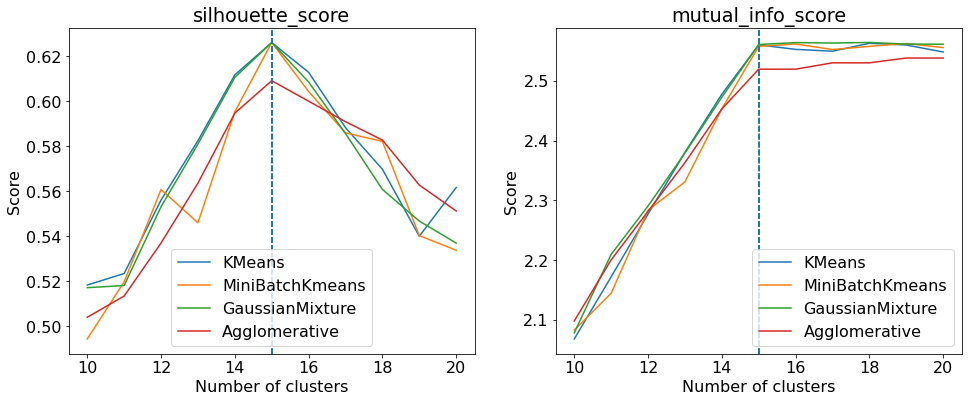

In [42]:
### BEGIN SOLUTION (do not delete this comment!)
fig, ax = plt.subplots(1, 2, figsize =(16, 6))

clusters = np.arange(10, 21)
silhouette = {'KMeans' : [], 'MiniBatchKmeans' : [], 'GaussianMixture': [], 'Agglomerative' : []}
mutual_info = {'KMeans' : [], 'MiniBatchKmeans' : [], 'GaussianMixture': [], 'Agglomerative' : []}

for num_cl in clusters:
        algs = [KMeans(n_clusters=num_cl, random_state=0, n_jobs=-1, **best_params_kmeans),
            MiniBatchKMeans(n_clusters=num_cl, random_state=0, **best_params_mbkmeans),
            GaussianMixture(n_components=num_cl, random_state=0, **best_params_gm),
            AgglomerativeClustering(n_clusters=num_cl, **best_params_agglom)]
        
        for i, alg, key in zip(range(4), algs, ['KMeans', 'MiniBatchKmeans', 'GaussianMixture', 'Agglomerative']):
            pred = alg.fit_predict(points)
            silhouette[key].append(silhouette_score(points, pred))
            mutual_info[key].append(mutual_info_score(labels, pred))
            
            
for i, metric, metric_name in zip([0, 1], [silhouette, mutual_info],
                                 ['silhouette_score', 'mutual_info_score']):
    for j, method in zip(range(4), ['KMeans', 'MiniBatchKmeans', 'GaussianMixture', 'Agglomerative']):
        ax[i].plot(clusters, metric[method], label = method)
        ax[i].axvline(true_clusters, linestyle = '--')
        ax[i].set_xlabel('Number of clusters')
        ax[i].set_ylabel('Score')
        ax[i].set_title(metric_name)
        ax[i].legend()

fig.show()
### END SOLUTION (do not delete this comment!)

### Task 4.2. Finding the Number of Clusters with Bootstrap. (1 pt.)
For a chosen algorithm find the best number of clusters using bootstrap. Based on your observations made at the previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.
1. Estimate variance of the clustering metric of your choice (i.e. *silhouette score*/*mutual information*/*adjusted mutual information*)and construct normal 95% **confidence interval (CI)**;
2. **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__ 
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

1) Estimate variance of the clustering metric of your choice (i.e. silhouette score/mutual information/adjusted mutual information)and construct normal 95% confidence interval (CI);

In [43]:
### BEGIN SOLUTION (do not delete this comment!)

### I chose KMeans since it provided high silhouette score and is more smooth and considered to be classic

import scipy.stats as sps
#from sklearn.utils import resample
from sklearn.metrics.cluster import adjusted_mutual_info_score

iters = 50
scores_silhouette = np.zeros((len(clusters), iters))
scores_mutual_info = np.zeros((len(clusters), iters))

for i, num_cl in enumerate(clusters):
    for idx in range(iters):
        alg = KMeans(n_clusters=num_cl, random_state=0, n_jobs=-1)
        indices = np.random.randint(0, points.shape[0], points.shape[0])
        points_resampled, labels_resampled = points[indices], labels[indices]
        #points_resampled, labels_resampled = resample(points, labels, replace=True, n_samples=points.shape[0], random_state=0)
        preds = alg.fit_predict(points_resampled)
        scores_silhouette[i, idx] = silhouette_score(points_resampled, preds) #adjusted_mutual_info_score(true_sample, preds)
        scores_mutual_info[i, idx] = adjusted_mutual_info_score(labels_resampled, preds)
        
low_sil, high_sil = sps.norm.interval(0.95, loc = np.mean(scores_silhouette, axis=1), 
                                      scale = np.std(scores_silhouette, axis=1))
low_info, high_info = sps.norm.interval(0.95, loc = np.mean(scores_mutual_info, axis=1), 
                                      scale = np.std(scores_mutual_info, axis=1))

### END SOLUTION (do not delete this comment!)

2) Plot the metric with the corresponding confidence intervals and show the best number of clusters.

Number of clusters: 10
Variance:  2.399749202028563e-05
Confidence interval: (0.511110003444492, 0.5303126467412742)

Number of clusters: 11
Variance:  3.542566707716139e-05
Confidence interval: (0.5234984566349292, 0.5468296581704297)

Number of clusters: 12
Variance:  3.2340477164812266e-05
Confidence interval: (0.5493827940012082, 0.571674910210328)

Number of clusters: 13
Variance:  1.4481966903610144e-05
Confidence interval: (0.5764964387676291, 0.5914137950351283)

Number of clusters: 14
Variance:  1.8623400272399018e-05
Confidence interval: (0.6040244360471443, 0.6209408216241787)

Number of clusters: 15
Variance:  1.6108365465295284e-05
Confidence interval: (0.6193660925731156, 0.6350988129486416)

Number of clusters: 16
Variance:  2.3464278114267104e-05
Confidence interval: (0.601237342711474, 0.620225450372141)

Number of clusters: 17
Variance:  4.2259772866457996e-05
Confidence interval: (0.5814021638646704, 0.6068846423342688)

Number of clusters: 18
Variance:  4.7065534309

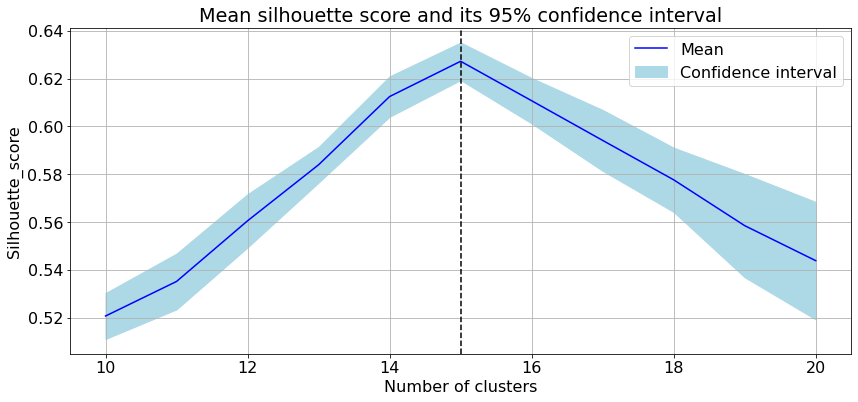

In [44]:
### BEGIN SOLUTION (do not delete this comment!)

for i, num_cl in enumerate(clusters):
    print('Number of clusters: {}'.format(num_cl))
    print('Variance: ', np.var(scores_silhouette, axis=1)[i])
    print('Confidence interval: ({}, {})\n'.format(low_sil[i], high_sil[i]))

plt.figure(figsize=(14, 6))

#plt.plot(clusters, np.mean(scores_mutual_info, axis=1), color='blue', label='Mean')
plt.plot(clusters, np.mean(scores_silhouette, axis=1), color='blue', label='Mean')
plt.fill_between(clusters, low_sil, high_sil, color = 'lightblue', label='Confidence interval')
#plt.fill_between(clusters, low_info, high_info, color = 'lightblue', label='Confidence interval')
plt.axvline(true_clusters, linestyle = '--', color = 'black')
plt.title("Mean silhouette score and its 95% confidence interval")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette_score")
plt.legend()
plt.grid(True)
plt.show()
### END SOLUTION (do not delete this comment!)

## Task 5. Practice with Different Anomaly Detection Algorithms. (2 pts)

### Task 5.1 (1 pt)

- Here we will use __fraud_dataset__ (creditcard.csv )
- Compute the __contamination__ (or impurity) on the **test** set as the ratio of anomaly objects to all the objects.  
- Predict the anomaly with any **three** Anomaly detection methods among ones from: https://scikit-learn.org/stable/modules/outlier_detection.html, note, we do not use true labels to fit anomaly detectors.
- Explore, how the `roc_auc_score` for anomaly detectors changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [45]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score

data = pd.read_csv('./creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split 

# delete the targets for training
train_y = 0

In [46]:
### BEGIN SOLUTION (do not delete this comment!)
  
# impurity estimation on test data

contamination = np.sum(test_y) / test_y.shape[0] # >>> your solution here <<<

### END SOLUTION (do not delete this comment!)

In [47]:
### BEGIN SOLUTION (do not delete this comment!)

from sklearn.ensemble import IsolationForest
#from sklearn.svm import OneClassSVM 
from sklearn.neighbors import LocalOutlierFactor # >>> your solution here <<<
from sklearn.covariance import EllipticEnvelope


det_name = ['IsolationForest', 'EllipticEnvelope', 'LocalOutlierFactor']

for i in [0.1, 1, 10]:
    detectors = [IsolationForest(n_estimators=30, random_state=0, n_jobs=-1, contamination = i * contamination),
                EllipticEnvelope(random_state=0, contamination = i * contamination),
                LocalOutlierFactor(n_neighbors=6, n_jobs=-1, novelty=True, contamination = i * contamination)]
    
    for det, name in zip(detectors, det_name):
        det.fit(train_X)
        labels_isolation = det.predict(test_X)
        labels_isolation[labels_isolation == 1] = 0
        labels_isolation[labels_isolation == -1] = 1

        print(name)
        print('Contamination: ', np.round(contamination * i, 3), ' ', 
              'ROC/AUC: ', np.round(roc_auc_score(test_y, labels_isolation), 3),
              'Precision: ', np.round(precision_score(test_y, labels_isolation, average = 'micro'), 3))
    
### END SOLUTION (do not delete this comment!)

IsolationForest
Contamination:  0.002   ROC/AUC:  0.51 Precision:  0.983
EllipticEnvelope
Contamination:  0.002   ROC/AUC:  0.5 Precision:  0.982
LocalOutlierFactor
Contamination:  0.002   ROC/AUC:  0.499 Precision:  0.982
IsolationForest
Contamination:  0.017   ROC/AUC:  0.761 Precision:  0.984
EllipticEnvelope
Contamination:  0.017   ROC/AUC:  0.66 Precision:  0.982
LocalOutlierFactor
Contamination:  0.017   ROC/AUC:  0.504 Precision:  0.971
IsolationForest
Contamination:  0.169   ROC/AUC:  0.883 Precision:  0.85
EllipticEnvelope
Contamination:  0.169   ROC/AUC:  0.779 Precision:  0.842
LocalOutlierFactor
Contamination:  0.169   ROC/AUC:  0.542 Precision:  0.789


BEGIN

We can notice that IsolationForest performed best of all and this superiority increased with the increase of contamination level.

END

### Task 5.2 (1 pt)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance. 


As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 

> Do not get confused, here we swap __train__ and __test__ and use __test__ as if it's the only data we have on our hands.

2. Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold. Write 1-2 sentences on your findings.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [48]:
### BEGIN SOLUTION (do not delete this comment!)

# your favorite classifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = []
pr_score = []

for train_index, test_index in skf.split(test_X, test_y):
    train_, test_ = test_X.iloc[train_index], test_X.iloc[test_index]
    train_labels_, test_labels_ = test_y.iloc[train_index], test_y.iloc[test_index]
    clf = SVC()
    scaler = MinMaxScaler()
    train_ = scaler.fit_transform(train_)
    test_ = scaler.transform(test_)
    clf.fit(train_, train_labels_)
    pred = clf.predict(test_)

    roc_auc_scores.append(roc_auc_score(test_labels_, pred))
    pr_score.append(precision_score(pred, test_labels_, average='micro'))
    
### END SOLUTION (do not delete this comment!)

print('ROC/AUC mean: ', np.mean(roc_auc_scores), 'std: ', np.std(roc_auc_scores))    
print('Precision mean: ', np.mean(pr_score), 'std: ', np.std(pr_score))

ROC/AUC mean:  0.8450000000000001 std:  0.05678908345800273
Precision mean:  0.99481446128147 std:  0.0017301219094790583


In [49]:
### BEGIN SOLUTION (do not delete this comment!)

# ensemble of classifiers
skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = []
pr_score = []

alg = IsolationForest(n_estimators=30, random_state=0, n_jobs=-1, contamination = contamination)
alg.fit(train_X)

for train_index, test_index in skf.split(test_X, test_y):
    train_, test_ = test_X.iloc[train_index], test_X.iloc[test_index]
    train_labels_, test_labels_ = test_y.iloc[train_index], test_y.iloc[test_index]
    clf = SVC()
    scaler = MinMaxScaler()
    #alg.fit(train_)
    new_train = scaler.fit_transform(np.concatenate((train_.values, alg.predict(train_).reshape(-1, 1)), axis=1))
    new_test = scaler.transform(np.concatenate((test_.values, alg.predict(test_).reshape(-1, 1)), axis=1))
    clf.fit(new_train, train_labels_)
    pred = clf.predict(new_test)
    
    roc_auc_scores.append(roc_auc_score(test_labels_, pred))
    pr_score.append(precision_score(pred, test_labels_, average='micro'))
### END SOLUTION (do not delete this comment!)
    
print('ROC/AUC mean: ', np.mean(roc_auc_scores), 'std: ', np.std(roc_auc_scores))    
print('Precision mean: ', np.mean(pr_score), 'std: ', np.std(pr_score))


ROC/AUC mean:  0.8548239436619719 std:  0.056651865742311645
Precision mean:  0.99481446128147 std:  0.0017301219094790583


BEGIN

My findings are that ROC/AUC and Precision almost don't depend on whether we train our ensemble method (IsolationForest in my solution) on train_X before splitting the data or on the subfold on each splitting of the data for sufficiently large number of estimators. Still, I preferred to train it on train_X because it proides more stable result, less depending on hyperparameters' choice.

One can notice that using ensembles led to the slight increase in ROC/AUC score but didn't improve precision which is actually not very useful here since we have very small number of anomalies.

END